In [1]:
# coding:utf-8
import arrow
import qgrid
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import jieba
    

from sklearn.model_selection import train_test_split


%matplotlib inline

sns.set(style='whitegrid')

ModuleNotFoundError: No module named 'arrow'

In [65]:
train_user = pd.read_csv('data/table1_user',encoding='utf-8',index_col = False, delimiter='\t',
                                 )
train_user.head()

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience
0,17e1b9f107dd1214bd78dec6d91593a4,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,100002000,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,大专,24,2017,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
1,0c02d9411e83ae0308cdc40700385d4c,763,"763,-,-",其他,化妆师,400106000,房地产/建筑/建材/工程,后期制作,0400106000,大专,24,2015,调色员|彩妆|护肤|布料|光源|客户|调色
2,1f4504451a08e1e99e0b394e03f24b43,530,"530,-,-","专业服务/咨询(财会/法律/人力资源等),教育/培训/院校","项目经理/项目主管,教学/教务管理人员,翻译（口译与笔译）",0,教育/培训/院校,项目管理/项目协调,1000115000,本科,33,2010,互联网参考模型osi七层|建设|英语|项目主管|签证|谈判|合同|crm系统|pl/sql|...
3,127b43572875dea9ed858da73a651433,871,"5085,-,-",房地产/建筑/建材/工程,行政/后勤/文秘,200104000,旅游/度假,行政/后勤/文秘,0200104000,大专,24,2017,行政|酒店|后勤|温泉|文员|文秘|旅游
4,15c607e1798305fb9f2e525d964a1185,530,"530,-,-","礼品/玩具/工艺美术/收藏品/奢侈品,教育/培训/院校,媒体/出版/影视/文化传播","艺术/设计,教育/培训",600108000,广告/会展/公关,艺术/设计,0600108000,大专,24,2015,上色|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...


In [66]:
train_job = pd.read_csv("data/table2_jd",delimiter="\t",error_bad_lines=False)
train_job.head()

b'Skipping line 173315: expected 18 fields, saw 20\n'
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,3cf395f1d6f12de112d118c0349acbcd,景观主创设计师,-,530,园林/景观设计,2,25000,15000,20190325,20190524,1,510,NaN,本科,\N,\N,\N,岗位职责：1、全面负责景观项目的概念设计和方案设计、扩初设计和施工图设计的工作，同时对方案文...
1,4ce99de185f55bea127ccd74c4bbf0ad,土建工程造价员,-,551,工程造价/预结算,5,8000,4000,20190313,20190412,1,305,NaN,大专,\N,\N,NaN,1、能够独立完成工程概、预、结算的编制及审核工作；2、熟悉重庆地区相关计价原则及计价文件；3...
2,d1181ba44c2cba01523b143dbf264636,汽车销售,-,719,汽车销售,5,10000,8001,20190301,20190410,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、负责整车销售服务和进店客户咨询服务；2、负责整理各车型的销售资料及客户档案；3...
3,4e5da61aeffaba3dfea3bdd09dcce8d9,客服文员/网络客服5000＋,-,565,网络/在线客服,10,8000,4000,20190220,20191217,0,-1,NaN,\N,\N,\N,NaN,高薪线上推广专员（可接受优秀应届毕业生）岗位职责：1、为客户提供快速、准确与专业的咨询及服务...
4,db4d4ce28d394344a4bf93c18242e7d2,中安华筑技术标专员（五险+双休+早九晚五）,-,664,工程造价/预结算,5,6000,4001,20190318,20190417,0,103,NaN,大专,\N,\N,NaN,岗位职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...


In [67]:
train_action = pd.read_csv("data/table3_action",delimiter="\t")


train_action['mix_sat']  = train_action['satisfied']*10+train_action['delivered']*3
train_action.loc[train_action.mix_sat==13,'mix_sat'] =10

train_action.head()

,user_id,jd_no,browsed,delivered,satisfied,mix_sat
0,17e1b9f107dd1214bd78dec6d91593a4,4ce99de185f55bea127ccd74c4bbf0ad,0,0,0,0
1,17e1b9f107dd1214bd78dec6d91593a4,e9959d3b5fd8b26da07e8b8a3b80489a,0,0,0,0
2,17e1b9f107dd1214bd78dec6d91593a4,7ecd6ab0c7e43b40b7d1dbd4a9b1e6f5,0,0,0,0
3,17e1b9f107dd1214bd78dec6d91593a4,112ea9c8ef92c1a7d5fa679cc6c05053,0,0,0,0
4,17e1b9f107dd1214bd78dec6d91593a4,1953082bf7ee0919820eb7ba05be3425,0,0,0,0


In [68]:
train_action[train_action['mix_sat']==3]

,user_id,jd_no,browsed,delivered,satisfied,mix_sat
24,17e1b9f107dd1214bd78dec6d91593a4,0511f976fb14c1a173ab2090db865615,1,1,0,3
60,17e1b9f107dd1214bd78dec6d91593a4,da807052cebe801436deeb033e91c3b9,1,1,0,3
73,17e1b9f107dd1214bd78dec6d91593a4,74c9357fe38695ae08476a514d2e3783,1,1,0,3
78,17e1b9f107dd1214bd78dec6d91593a4,e4a5ca2cdf2df0d7a361f86c59dfd2b9,1,1,0,3
130,0c02d9411e83ae0308cdc40700385d4c,590428243aea8b6ee5162f37c4867cf9,1,1,0,3
131,0c02d9411e83ae0308cdc40700385d4c,da1de3779fd2c878b3b70e73b515d1a4,1,1,0,3
160,1f4504451a08e1e99e0b394e03f24b43,8b9b5ea892b9b7eb791fcc432a426a7e,1,1,0,3
161,1f4504451a08e1e99e0b394e03f24b43,1b17abf2d092ffaecb953d84dd5c7fc6,1,1,0,3
162,1f4504451a08e1e99e0b394e03f24b43,6ec4d76d4dddc2179cce8d9e62bf891f,1,1,0,3
166,1f4504451a08e1e99e0b394e03f24b43,c1aec8b3c1caf4e6ef79c0f5dcef7bd9,1,1,0,3


In [69]:
test_action = pd.read_csv("data/zhaopin_round1_user_exposure_A_20190723",delim_whitespace=True)
test_action.head()

,user_id,jd_no
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609
4,035b5c8e977d2f76628d9b7edfc95323,5bc733283200a5d7b5cf3eb45cde4db7


In [70]:
test_user = pd.read_csv("data/user_ToBePredicted",delimiter="\t")
test_user.head()

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience
0,0749d9a864562008d1f61fc9d14e1d28,531,"531,-,-","大型设备/机电设备/重工业,房地产/建筑/建材/工程,电气/电力/水利","项目经理/项目主管,房地产项目管理,项目专员/助理",600108000,大型设备/机电设备/重工业,项目管理/项目协调,0400106000,NaN,24,2016,互联网参考模型osi七层|文件|材料|项目管理|成本分析|风险|材料采购|工程部|保证|成本...
1,121cc4b0ea96666856c58ee25c2d945e,576,"530,576,854","房地产|建筑业,文化|传媒|娱乐|体育,环保","建筑制图,三维/3D设计/制作,设计管理人员",0,房地产/建筑/建材/工程,影视/媒体/出版/印刷,0800110000,本科,27,2012,三维|pr|ps|现场|bim|模型|建设|处理|知识|钢结构|施工人员|变更|动画|视频|...
2,19840deca71b87c132b9a3c55d22fc77,653,"664,-,-",其他,其他,400106000,房地产/建筑/建材/工程,工程监理/质量管理,0400106000,本科,27,2015,过程控制|现场|检查|人力|施工单位|工程|核对|工程师|图书馆|监理员|组团|土建|安全|...
3,20edcc2707909ab6bfc32fa72de7639f,719,"719,-,-","专业服务/咨询(财会/法律/人力资源等),房地产/建筑/建材/工程,信托/担保/拍卖/典当","出纳员,会计助理/文员",0,媒体/出版/影视/文化传播,财务/审计/税务,0400106000,本科,24,2017,账户|现场|收款|银行|对账|票据|office|采集|业务|责任心|单位|会计工作|沟通能...
4,154d443475ee8c77a2b3c8b26c5209f2,647,"647,-,-",房地产/建筑/建材/工程,"土木/建筑/装修/市政工程,房地产开发/经纪/中介",800110000,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0600108000,本科,30,2010,计划|环保|立项|现场|检测|建设|处理|房地产|合同|手续|责任心|建造师|变更|工程造价...


In [71]:
test_big_table = pd.merge(test_action,test_user,how="inner",on="user_id")
test_big_table = pd.merge(test_big_table,train_job,how="inner",on="jd_no")
test_big_table.head()

,user_id,jd_no,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,...,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190214,20190316,0,305,NaN,大专,\N,\N,NaN,岗位职责：1、规划并建立公司行政管理体系，制定并完成年度行政工作计划;2、对公司行政管理成本...
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190319,20190418,0,305,NaN,中技,\N,\N,NaN,技能：熟练掌握别克GL8驾驶技术，懂得车辆保养维护，熟悉长春市内道路。任职要求：给老板开车，...
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190307,20190406,0,-1,NaN,大专,\N,\N,NaN,岗位职责：1、负责办公室行政相关的工作；2、与工程业务相关的辅助性文职工作；3、公司资质的维...
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190314,20190423,0,103,NaN,中专,\N,\N,NaN,近期不在长春或不能参加面试者勿投！【工作时间】早8：30至16：00；周六周日双休，法定节假...
4,0e7587fca175bc2ac62f087f9d4c04c1,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","文体教育|工艺美术,交通|运输|物流|仓储,广告/会展/公关","行政专员/助理,文档/资料管理,文案策划",200104000,教育/培训/院校,行政/后勤/文秘,0200104000,...,20190314,20190423,0,103,NaN,中专,\N,\N,NaN,近期不在长春或不能参加面试者勿投！【工作时间】早8：30至16：00；周六周日双休，法定节假...


In [72]:
train_big_table = pd.merge(train_action,train_user,how="inner",on="user_id")
train_big_table = pd.merge(train_big_table,train_job,how="inner",on="jd_no")
train_big_table.head()

,user_id,jd_no,browsed,delivered,satisfied,mix_sat,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,...,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,17e1b9f107dd1214bd78dec6d91593a4,4ce99de185f55bea127ccd74c4bbf0ad,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,1,305,NaN,大专,\N,\N,NaN,1、能够独立完成工程概、预、结算的编制及审核工作；2、熟悉重庆地区相关计价原则及计价文件；3...
1,17e1b9f107dd1214bd78dec6d91593a4,e9959d3b5fd8b26da07e8b8a3b80489a,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190318,20190417,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、根据招标方要求编制招标文件，负责报建等招标代理项目流程；2、负责组织现场答疑会...
2,04edcbfd579b127171e32d7e334f9368,e9959d3b5fd8b26da07e8b8a3b80489a,1,1,0,3,551,"551,551,551","电气/电力/水利,房地产/建筑/建材/工程","项目招投标,前台/总机/接待,内勤人员",...,20190318,20190417,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、根据招标方要求编制招标文件，负责报建等招标代理项目流程；2、负责组织现场答疑会...
3,17e1b9f107dd1214bd78dec6d91593a4,7ecd6ab0c7e43b40b7d1dbd4a9b1e6f5,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,0,1,NaN,大专,\N,\N,NaN,岗位职责：1.协助设计师完成方案图纸或施工图纸的绘制；2.协助设计师负责现场施工维护；3.协...
4,17e1b9f107dd1214bd78dec6d91593a4,112ea9c8ef92c1a7d5fa679cc6c05053,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,0,1,NaN,大专,\N,\N,NaN,岗位职责：1.协助设计师完成方案图纸或施工图纸的绘制；2.协助设计师负责现场施工维护；3.协...


In [73]:
def extract_city(citys,index):
    city_list = citys.split(",")
    if index < len(city_list):
        city = city_list[index]
        if city != "-":
            city = int(city)
        else:
            city = -1
    else:
        city = -1
    return city

def exp_in_desc(exp,desc):
    if str(exp) == "nan":
        exp = ""
    exps = exp.split("|")
    num = 0
    for item in exps:
        if item in desc:
            num+=1
    return num

In [74]:
min_year_dict = {
    305: 4,
    -1:-1,
    1:1,
    103:2,
    0:0,
    510:7,
    1099:10,
    399:4,
    599:7,
    199:1,
    299:2,
    110:1
}
degree_dict = {
    "初中":1,
    "中技":2,
    "高中":3,
    "中专":3,
    "大专":4,
    "本科":5,
    "硕士":6,
    "博士":7,
    "EMBA":7,
    "MBA":6,
    "其他":0,
    "请选择":0,
    "\\N":0,
    "na":0
}
min_salary_dict = {
    100002000:1000,
    400106000:4001,
    0:0,
    200104000:2001,
    600108000:6001,
    800110000:8001,
    1000115000:10001,
    2500199999:25001,
    1500125000:15001,
    3500150000:35001,
    70001100000:70001,
    1000:0,
    100001150000:100001,
    2500135000:25001,
    5000170000:50001
}
max_salary_dict = {
    100002000:2000,
    400106000:6000,
    0:0,
    200104000:4000,
    600108000:8000,
    800110000:10000,
    1000115000:15000,
    2500199999:99999,
    1500125000:25000,
    3500150000:50000,
    70001100000:100000,
    1000:1000,
    100001150000:150000,
    2500135000:35000,
    5000170000:70000
}

In [75]:
from functools import partial
def fe(df):
    df["desire_jd_city_1"] = df["desire_jd_city_id"].apply(partial(extract_city,index=0))
    df["desire_jd_city_2"] = df["desire_jd_city_id"].apply(partial(extract_city,index=1))
    df["desire_jd_city_3"] = df["desire_jd_city_id"].apply(partial(extract_city,index=2))
    df["desire_jd_city_num"] = df[["desire_jd_city_1","desire_jd_city_2","desire_jd_city_3"]].sum(axis=1)
    
    df["city_equal_desired_city_1"] = df["desire_jd_city_1"]==df["city"]
    df["city_equal_desired_city_2"] = df["desire_jd_city_2"]==df["city"]
    df["city_equal_desired_city_3"] = df["desire_jd_city_3"]==df["city"]
    
    
    
    df["work_years"] = 2019-df["start_work_date"].apply(lambda x : 2018 if x=="-" else int(x))
    
    
    df["desire_min_salary"] = df["desire_jd_salary_id"].apply(lambda x: min_salary_dict[x])
    df["desire_max_salary"] = df["desire_jd_salary_id"].apply(lambda x: max_salary_dict[x])
    df["desire_salary_diff"] = df["desire_max_salary"]-df["desire_min_salary"]
    
    df["min_years"] = df["min_years"].apply(lambda x: min_year_dict[x])
    
    df["work_years_statisfied"] = df["work_years"].astype(int) > df["min_years"]
    
    df["salary_large_than_desire"] = df["desire_min_salary"] > df["min_salary"]
    
    df["cur_salary_min"] = df["cur_salary_id"].apply(lambda x: min_salary_dict[int(x if str.isnumeric(x) else "0")])
    df["cur_salary_max"] = df["cur_salary_id"].apply(lambda x: max_salary_dict[int(x if str.isnumeric(x) else "0")])
    
    df["salary_large_than_cur"] = df["cur_salary_min"] > df["min_salary"]
    
    df["cur_degree_id"] = df["cur_degree_id"].fillna("na").apply(lambda x:degree_dict[x.strip()])
    
    df["job_description_len"] = df["job_description"].apply(len)
    
    df["experience_num"] = df["experience"].apply(lambda x: len(str(x).split("|")) if str(x) != "nan" else 0)
    
    df["min_edu_level"] = df["min_edu_level"].fillna("na").apply(lambda x:degree_dict[x.strip()])
    exp_in_desc_num = []
    for idx, data in df.iterrows():
        exp_in_desc_num.append(exp_in_desc(data["experience"],data["job_description"]))
    df["exp_in_desc_num"] = exp_in_desc_num
    
#     "live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
#          "cur_degree_id","city","jd_sub_type",
#          "max_salary","min_salary","is_travel","min_years","min_edu_level",
#          "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"
    cross_feature_tuple = [("live_city_id","city"),("live_city_id","desire_jd_city_1"),("cur_industry_id","jd_sub_type"),
                          ("cur_jd_type","jd_sub_type"),("cur_salary_id","cur_degree_id"),("city","jd_sub_type"),
                          ("jd_sub_type","min_salary"),("jd_sub_type","max_salary"),("jd_sub_type","is_travel"),
                          ("min_years","jd_sub_type"),("jd_sub_type","require_nums")]
    cross_feature_names = list(feature[0]+"&"+feature[1] for feature in cross_feature_tuple)
    print("create cross features",cross_feature_names)
    for idx,(fa,fb) in enumerate(cross_feature_tuple):
        df[cross_feature_names[idx]] = df[fa].astype(str)+df[fb].astype(str)
    return cross_feature_names

In [76]:
cross_feature_names = fe(train_big_table)
fe(test_big_table)

create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']
create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']


['live_city_id&city',
 'live_city_id&desire_jd_city_1',
 'cur_industry_id&jd_sub_type',
 'cur_jd_type&jd_sub_type',
 'cur_salary_id&cur_degree_id',
 'city&jd_sub_type',
 'jd_sub_type&min_salary',
 'jd_sub_type&max_salary',
 'jd_sub_type&is_travel',
 'min_years&jd_sub_type',
 'jd_sub_type&require_nums']

In [51]:
all_big_table = pd.concat([train_big_table,test_big_table])

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [52]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm as tqdm
import lightgbm as lgb

In [53]:
def feature_select(target,*df_list):
    result = []
    cat_features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
         "cur_degree_id","city","jd_sub_type",
         "max_salary","min_salary","is_travel","min_years","min_edu_level",
         "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"]+cross_feature_names
    lbl_dict = {}
    for f in cat_features:
        lbl = LabelEncoder()
        lbl.fit(all_big_table[f].astype(str))
        lbl_dict[f] = lbl
    for df in df_list:
        features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names

        x = df[features]
        if target in df.columns:
            y = df[target]
        else:
            y = None
        for f in cat_features:
            lbl = lbl_dict[f]
            x[f] = lbl.transform(x[f].astype(str))
        result.append((x,y))
    return result

In [84]:
from sklearn.model_selection import train_test_split
train_users = train_big_table["user_id"].unique()
t_user,v_user = train_test_split(train_users, shuffle=True)
train_data = train_big_table[train_big_table["user_id"].isin(t_user)]
valid_data = train_big_table[train_big_table["user_id"].isin(v_user)]
train_group = train_data.groupby("user_id",as_index=False).count()["satisfied"].values
valid_group = valid_data.groupby("user_id",as_index=False).count()["satisfied"].values
test_group = test_big_table.groupby("user_id",as_index=False).count()["jd_no"].values

In [86]:
result = feature_select("satisfied",train_data,valid_data,test_big_table)
t_x,t_y = result[0]
v_x,v_y = result[1]

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
valid_idx

array(['0ec027cda4d5c46080bccff29e6cd0dd',
       '010a554757e55362f15a0ef7f77ab835',
       '12ccabaca7d7eb27c3d4d29108ff3006', ...,
       '2421f3d77b3d66a2dda4015a43272cb7',
       '1318366112e84dae688e1f15bcd8098c',
       '242a2b1929a6993419233e3fd34e363b'], dtype=object)

In [95]:
#model = XGBClassifier()
from sklearn.model_selection import StratifiedKFold


learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
model = lgb.LGBMRanker(dict(n_estimators=1000,metric="map",colsample_bytree=0.2,max_depth=7,importance_type="gain"))
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)




In [96]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(model, param_grid, n_jobs=-1,cv=kfold,scoring='accuracy')
#grid_result = grid_search.fit(X, Y)


In [97]:
grid_search.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
                 )

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x101f32ae0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/zhuangzhuanghuang/miniconda2/envs/3point6...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/zhuan.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x101f32ae0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/zhuangzhuanghuang/miniconda2/envs/3point6...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/zhuan.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    500         if self.poller is not None:
    501             self.poller.start()
    502         self.kernel.start()
    503         self.io_loop = ioloop.IOLoop.current()
    504         try:
--> 505             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    506         except KeyboardInterrupt:
    507             pass
    508 
    509 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1421                         logger.warning('Executing %s took %.3f seconds',
   1422                                        _format_handle(handle), dt)
   1423                 finally:
   1424                     self._current_handle = None
   1425             else:
-> 1426                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...608>, ...]))>))>>
   1427         handle = None  # Needed to break cycles when an exception occurs.
   1428 
   1429     def _set_coroutine_wrapper(self, enabled):
   1430         try:

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/asyncio/events.py in _run(self=<Handle IOLoop._run_callback(functools.par...608>, ...]))>))>)
    122             self._callback = None
    123             self._args = None
    124 
    125     def _run(self):
    126         try:
--> 127             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_w...ea0550>, <zmq.sugar.fr...t 0x167ea0608>, ...]))>),)
    128         except Exception as exc:
    129             cb = _format_callback_source(self._callback, self._args)
    130             msg = 'Exception in callback {}'.format(cb)
    131             context = {

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_w...ea0550>, <zmq.sugar.fr...t 0x167ea0608>, ...]))>))
    753         """Runs a callback with error handling.
    754 
    755         For use in subclasses.
    756         """
    757         try:
--> 758             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_w...ea0550>, <zmq.sugar.fr...t 0x167ea0608>, ...]))>)
    759             if ret is not None:
    760                 from tornado import gen
    761                 # Functions that return Futures typically swallow all
    762                 # exceptions and store them in the Future.  If a Future

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<Future finished result=(10, 292, <bound method....7ea0550>, <zmq.sugar.fr...t 0x167ea0608>, ...]))>,), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<Future finished result=(10, 292, <bound method....7ea0550>, <zmq.sugar.fr...t 0x167ea0608>, ...]))>,)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/gen.py in inner(f=None)
   1228             return False
   1229         elif not self.future.done():
   1230             def inner(f):
   1231                 # Break a reference cycle to speed GC.
   1232                 f = None  # noqa
-> 1233                 self.run()
   1234             self.io_loop.add_future(
   1235                 self.future, inner)
   1236             return False
   1237         return True

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/gen.py in run(self=<tornado.gen.Runner object>)
   1142                         finally:
   1143                             # Break up a reference to itself
   1144                             # for faster GC on CPython.
   1145                             exc_info = None
   1146                     else:
-> 1147                         yielded = self.gen.send(value)
        yielded = undefined
        self.gen.send = <built-in method send of generator object>
        value = (10, 292, <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>, (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]))
   1148 
   1149                     if stack_context._state.contexts is not orig_stack_contexts:
   1150                         self.gen.throw(
   1151                             stack_context.StackContextInconsistentError(

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/kernelbase.py in process_one(self=<ipykernel.ipkernel.IPythonKernel object>, wait=True)
    352         else:
    353             try:
    354                 priority, t, dispatch, args = self.msg_queue.get_nowait()
    355             except QueueEmpty:
    356                 return None
--> 357         yield gen.maybe_future(dispatch(*args))
        dispatch = <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>
        args = (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    358 
    359     @gen.coroutine
    360     def dispatch_queue(self):
    361         """Coroutine to preserve order of message handling

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]), **kwargs={})
    321                 # never actually yields, which in turn allows us to
    322                 # use "optional" coroutines in critical path code without
    323                 # performance penalty for the synchronous case.
    324                 try:
    325                     orig_stack_contexts = stack_context._state.contexts
--> 326                     yielded = next(result)
        yielded = undefined
        result = <generator object dispatch_shell>
    327                     if stack_context._state.contexts is not orig_stack_contexts:
    328                         yielded = _create_future()
    329                         yielded.set_exception(
    330                             stack_context.StackContextInconsistentError(

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 8, 6, 15, 6, 22, 483256, tzinfo=tzutc()), 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'session': '64647a46e55b46a9bed03cc83e3dc4eb', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'parent_header': {}})
    262             try:
    263                 self.pre_handler_hook()
    264             except Exception:
    265                 self.log.debug("Unable to signal in pre_handler_hook:", exc_info=True)
    266             try:
--> 267                 yield gen.maybe_future(handler(stream, idents, msg))
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'64647a46e55b46a9bed03cc83e3dc4eb']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 8, 6, 15, 6, 22, 483256, tzinfo=tzutc()), 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'session': '64647a46e55b46a9bed03cc83e3dc4eb', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'parent_header': {}}
    268             except Exception:
    269                 self.log.error("Exception in message handler:", exc_info=True)
    270             finally:
    271                 try:

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [b'64647a46e55b46a9bed03cc83e3dc4eb'], {'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 8, 6, 15, 6, 22, 483256, tzinfo=tzutc()), 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'session': '64647a46e55b46a9bed03cc83e3dc4eb', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'parent_header': {}}), **kwargs={})
    321                 # never actually yields, which in turn allows us to
    322                 # use "optional" coroutines in critical path code without
    323                 # performance penalty for the synchronous case.
    324                 try:
    325                     orig_stack_contexts = stack_context._state.contexts
--> 326                     yielded = next(result)
        yielded = undefined
        result = <generator object execute_request>
    327                     if stack_context._state.contexts is not orig_stack_contexts:
    328                         yielded = _create_future()
    329                         yielded.set_exception(
    330                             stack_context.StackContextInconsistentError(

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'64647a46e55b46a9bed03cc83e3dc4eb'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 8, 6, 15, 6, 22, 483256, tzinfo=tzutc()), 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'session': '64647a46e55b46a9bed03cc83e3dc4eb', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bc0b5f22ee3a4f988db95aae4b498c12', 'msg_type': 'execute_request', 'parent_header': {}})
    529             self._publish_execute_input(code, parent, self.execution_count)
    530 
    531         reply_content = yield gen.maybe_future(
    532             self.do_execute(
    533                 code, silent, store_history,
--> 534                 user_expressions, allow_stdin,
        user_expressions = {}
        allow_stdin = True
    535             )
    536         )
    537 
    538         # Flush output before sending the reply.

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', False, True, {}, True), **kwargs={})
    321                 # never actually yields, which in turn allows us to
    322                 # use "optional" coroutines in critical path code without
    323                 # performance penalty for the synchronous case.
    324                 try:
    325                     orig_stack_contexts = stack_context._state.contexts
--> 326                     yielded = next(result)
        yielded = undefined
        result = <generator object do_execute>
    327                     if stack_context._state.contexts is not orig_stack_contexts:
    328                         yielded = _create_future()
    329                         yielded.set_exception(
    330                             stack_context.StackContextInconsistentError(

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    289                     res = yield coro_future
    290             else:
    291                 # runner isn't already running,
    292                 # make synchronous call,
    293                 # letting shell dispatch to loop runners
--> 294                 res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        code = 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )'
        store_history = True
        silent = False
    295         finally:
    296             self._restore_input()
    297 
    298         if res.error_before_exec is not None:

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )',), **kwargs={'silent': False, 'store_history': True})
    531             )
    532         self.payload_manager.write_payload(payload)
    533 
    534     def run_cell(self, *args, **kwargs):
    535         self._last_traceback = None
--> 536         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )',)
        kwargs = {'silent': False, 'store_history': True}
    537 
    538     def _showtraceback(self, etype, evalue, stb):
    539         # try to preserve ordering of tracebacks and print statements
    540         sys.stdout.flush()

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', store_history=True, silent=False, shell_futures=True)
   2814         result : :class:`ExecutionResult`
   2815         """
   2816         result = None
   2817         try:
   2818             result = self._run_cell(
-> 2819                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )'
        store_history = True
        silent = False
        shell_futures = True
   2820         finally:
   2821             self.events.trigger('post_execute')
   2822             if not silent:
   2823                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', store_history=True, silent=False, shell_futures=True)
   2840             runner = self.loop_runner
   2841         else:
   2842             runner = _pseudo_sync_runner
   2843 
   2844         try:
-> 2845             return runner(coro)
        runner = <function _pseudo_sync_runner>
        coro = <generator object InteractiveShell.run_cell_async>
   2846         except BaseException as e:
   2847             info = ExecutionInfo(raw_cell, store_history, silent, shell_futures)
   2848             result = ExecutionResult(info)
   2849             result.error_in_exec = e

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/async_helpers.py in _pseudo_sync_runner(coro=<generator object InteractiveShell.run_cell_async>)
     62 
     63     Credit to Nathaniel Smith
     64 
     65     """
     66     try:
---> 67         coro.send(None)
        coro.send = <built-in method send of generator object>
     68     except StopIteration as exc:
     69         return exc.value
     70     else:
     71         # TODO: do not raise but return an execution result with the right info.

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_async(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid_search.fit(t_x,t_y,group=train_group,eval_s...topping_rounds=100,verbose=10,\n                 )', store_history=True, silent=False, shell_futures=True)
   3015                 interactivity = "none" if silent else self.ast_node_interactivity
   3016                 if _run_async:
   3017                     interactivity = 'async'
   3018 
   3019                 has_raised = yield from self.run_ast_nodes(code_ast.body, cell_name,
-> 3020                        interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   3021 
   3022                 self.last_execution_succeeded = not has_raised
   3023                 self.last_execution_result = result
   3024 

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-97-de3220d8cf2c>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1bf1e0160, execution_...rue silent=False shell_futures=True> result=None>)
   3186                         return True
   3187 
   3188                 for i, node in enumerate(to_run_interactive):
   3189                     mod = ast.Interactive([node])
   3190                     code = compiler(mod, cell_name, "single")
-> 3191                     if (yield from self.run_code(code, result)):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1536d08a0, file "<ipython-input-97-de3220d8cf2c>", line 1>
        result = <ExecutionResult object at 1bf1e0160, execution_...rue silent=False shell_futures=True> result=None>
   3192                         return True
   3193 
   3194             # Flush softspace
   3195             if softspace(sys.stdout, 0):

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1536d08a0, file "<ipython-input-97-de3220d8cf2c>", line 1>, result=<ExecutionResult object at 1bf1e0160, execution_...rue silent=False shell_futures=True> result=None>, async_=False)
   3262                 if async_:
   3263                     last_expr = (yield from self._async_exec(code_obj, self.user_ns))
   3264                     code = compile('last_expr', 'fake', "single")
   3265                     exec(code, {'last_expr': last_expr})
   3266                 else:
-> 3267                     exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1536d08a0, file "<ipython-input-97-de3220d8cf2c>", line 1>
        self.user_global_ns = {'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# coding:utf-8\nimport arrow\nimport qgrid\nimport ...atplotlib', 'inline')\n\nsns.set(style='whitegrid')", "train_user = pd.read_csv('data/table1_user',enco...                              )\ntrain_user.head()", 'train_job = pd.read_csv("data/table2_jd",delimiter="\\t",error_bad_lines=False)\ntrain_job.head()', 'train_action = pd.read_csv("data/table3_action",delimiter="\\t")\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",... + train_action[\'delivered\']\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...action.apply(mix_sat,axis=1)\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...action.apply(mix_sat,axis=1)\n\ntrain_action.head()', "# coding:utf-8\nimport arrow\nimport qgrid\nimport ...atplotlib', 'inline')\n\nsns.set(style='whitegrid')", "train_user = pd.read_csv('data/table1_user',enco...                              )\ntrain_user.head()", 'train_job = pd.read_csv("data/table2_jd",delimiter="\\t",error_bad_lines=False)\ntrain_job.head()', 'train_action = pd.read_csv("data/table3_action",...rain_action[\'delivered\']*0.3\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...rain_action[\'delivered\']*0.3\n\ntrain_action.head()', "train_action[train_action['mix_sat'] ==1.3]", "train_action[train_action['mix_sat'] ==0.3]", "train_action[train_action['mix_sat'] ==1.3,'mix_sat'] = 1", "train_action[train_action['mix_sat'] ==1.3,'mix_sat'] ", "train_action[train_action.mix_sat==1.3,'mix_sat'] ", "train_actio.loc[train_action.mix_sat==1.3,'mix_sat'] =1", "train_action.loc[train_action.mix_sat==1.3,'mix_sat'] =1", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {2:                             user_id  live_city_i...|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...  , 3:                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , 4:                             user_id             ...0          0  
4        0          0          0  , 5:                             user_id             ...  0  
4        0          0          0        0  , 9:                             user_id  live_city_i...|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...  , 10:                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , 12:                             user_id             ...0.0  
4        0          0          0      0.0  , 13:                                  user_id        ...1          1      1.3  

[31889 rows x 6 columns], 14:                                  user_id        ...1          0      0.3  

[34396 rows x 6 columns], 20:                             user_id             ...0.0  
4        0          0          0      0.0  , ...}, 'Series': <class 'pandas.core.series.Series'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': array(['0ec027cda4d5c46080bccff29e6cd0dd',
     ...242a2b1929a6993419233e3fd34e363b'], dtype=object), '_10':                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , ...}
        self.user_ns = {'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# coding:utf-8\nimport arrow\nimport qgrid\nimport ...atplotlib', 'inline')\n\nsns.set(style='whitegrid')", "train_user = pd.read_csv('data/table1_user',enco...                              )\ntrain_user.head()", 'train_job = pd.read_csv("data/table2_jd",delimiter="\\t",error_bad_lines=False)\ntrain_job.head()', 'train_action = pd.read_csv("data/table3_action",delimiter="\\t")\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",... + train_action[\'delivered\']\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...action.apply(mix_sat,axis=1)\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...action.apply(mix_sat,axis=1)\n\ntrain_action.head()', "# coding:utf-8\nimport arrow\nimport qgrid\nimport ...atplotlib', 'inline')\n\nsns.set(style='whitegrid')", "train_user = pd.read_csv('data/table1_user',enco...                              )\ntrain_user.head()", 'train_job = pd.read_csv("data/table2_jd",delimiter="\\t",error_bad_lines=False)\ntrain_job.head()', 'train_action = pd.read_csv("data/table3_action",...rain_action[\'delivered\']*0.3\n\ntrain_action.head()', 'train_action = pd.read_csv("data/table3_action",...rain_action[\'delivered\']*0.3\n\ntrain_action.head()', "train_action[train_action['mix_sat'] ==1.3]", "train_action[train_action['mix_sat'] ==0.3]", "train_action[train_action['mix_sat'] ==1.3,'mix_sat'] = 1", "train_action[train_action['mix_sat'] ==1.3,'mix_sat'] ", "train_action[train_action.mix_sat==1.3,'mix_sat'] ", "train_actio.loc[train_action.mix_sat==1.3,'mix_sat'] =1", "train_action.loc[train_action.mix_sat==1.3,'mix_sat'] =1", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {2:                             user_id  live_city_i...|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...  , 3:                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , 4:                             user_id             ...0          0  
4        0          0          0  , 5:                             user_id             ...  0  
4        0          0          0        0  , 9:                             user_id  live_city_i...|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...  , 10:                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , 12:                             user_id             ...0.0  
4        0          0          0      0.0  , 13:                                  user_id        ...1          1      1.3  

[31889 rows x 6 columns], 14:                                  user_id        ...1          0      0.3  

[34396 rows x 6 columns], 20:                             user_id             ...0.0  
4        0          0          0      0.0  , ...}, 'Series': <class 'pandas.core.series.Series'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': array(['0ec027cda4d5c46080bccff29e6cd0dd',
     ...242a2b1929a6993419233e3fd34e363b'], dtype=object), '_10':                               jd_no             ...职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...  , ...}
   3268             finally:
   3269                 # Reset our crash handler in place
   3270                 sys.excepthook = old_excepthook
   3271         except SystemExit as e:

...........................................................................
/Users/zhuangzhuanghuang/Code/zhaopin_round1_train_20190716/<ipython-input-97-de3220d8cf2c> in <module>()
----> 1 grid_search.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
      2                  )

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=StratifiedKFold(n_splits=10, ran...ore='warn',
       scoring='accuracy', verbose=0), X=        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], y=0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64, groups=None, **fit_params={'early_stopping_rounds': 100, 'eval_group': [array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], 'eval_set': [(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], 'group': array([146, 109,   9, ...,  14, 367, 202]), 'verbose': 10})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of StratifiedKFold(n_splits=10, random_state=7, shuffle=True)>
        X =         live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns]
        y = 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Tue Aug  6 23:06:24 2019
PID: 31657Python 3.6.2: /Users/zhuangzhuanghuang/miniconda2/envs/3point6/bin/python
...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LGBMRanker(boosting_type={'n_estimators': 1000, ...      subsample_for_bin=200000, subsample_freq=0),         live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64, {'score': make_scorer(accuracy_score)}, memmap([     0,      1,      2, ..., 477346, 477347, 477348]), array([    34,     46,     88, ..., 477312, 477319, 477341]), 0, {'learning_rate': 0.0001}), {'error_score': 'raise', 'fit_params': {'early_stopping_rounds': 100, 'eval_group': [array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], 'eval_set': [(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], 'group': array([146, 109,   9, ...,  14, 367, 202]), 'verbose': 10}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LGBMRanker(boosting_type={'n_estimators': 1000, ...      subsample_for_bin=200000, subsample_freq=0),         live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64, {'score': make_scorer(accuracy_score)}, memmap([     0,      1,      2, ..., 477346, 477347, 477348]), array([    34,     46,     88, ..., 477312, 477319, 477341]), 0, {'learning_rate': 0.0001})
        kwargs = {'error_score': 'raise', 'fit_params': {'early_stopping_rounds': 100, 'eval_group': [array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], 'eval_set': [(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], 'group': array([146, 109,   9, ...,  14, 367, 202]), 'verbose': 10}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=LGBMRanker(boosting_type={'n_estimators': 1000, ...      subsample_for_bin=200000, subsample_freq=0), X=        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], y=0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64, scorer={'score': make_scorer(accuracy_score)}, train=memmap([     0,      1,      2, ..., 477346, 477347, 477348]), test=array([    34,     46,     88, ..., 477312, 477319, 477341]), verbose=0, parameters={'learning_rate': 0.0001}, fit_params={'early_stopping_rounds': 100, 'eval_group': [array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], 'eval_set': [(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], 'group': array([146, 109,   9, ...,  14, 367, 202]), 'verbose': 10}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LGBMRanker.fit of LGBMRanker(boost...     subsample_for_bin=200000, subsample_freq=0)>
        X_train =         live_city_id  desire_jd_salary_id  cur_i...               3955  

[429613 rows x 45 columns]
        y_train = 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 429613, dtype: int64
        fit_params = {'early_stopping_rounds': 100, 'eval_group': [array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], 'eval_set': [(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], 'group': array([146, 109,   9, ...,  14, 367, 202]), 'verbose': 10}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/lightgbm/sklearn.py in fit(self=LGBMRanker(boosting_type={'n_estimators': 1000, ...      subsample_for_bin=200000, subsample_freq=0), X=        live_city_id  desire_jd_salary_id  cur_i...               3955  

[429613 rows x 45 columns], y=0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 429613, dtype: int64, sample_weight=None, init_score=None, group=array([146, 109,   9, ...,  14, 367, 202]), eval_set=[(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], eval_names=None, eval_sample_weight=None, eval_init_score=None, eval_group=[array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], eval_metric=None, eval_at=[1], early_stopping_rounds=100, verbose=10, feature_name='auto', categorical_feature='auto', callbacks=None)
    850                                     eval_init_score=eval_init_score, eval_group=eval_group,
    851                                     eval_metric=eval_metric,
    852                                     early_stopping_rounds=early_stopping_rounds,
    853                                     verbose=verbose, feature_name=feature_name,
    854                                     categorical_feature=categorical_feature,
--> 855                                     callbacks=callbacks)
        callbacks = None
    856         return self
    857 
    858     _base_doc = LGBMModel.fit.__doc__
    859     fit.__doc__ = (_base_doc[:_base_doc.find('eval_class_weight :')]

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/lightgbm/sklearn.py in fit(self=LGBMRanker(boosting_type={'n_estimators': 1000, ...      subsample_for_bin=200000, subsample_freq=0), X=        live_city_id  desire_jd_salary_id  cur_i...               3955  

[429613 rows x 45 columns], y=0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 429613, dtype: int64, sample_weight=None, init_score=None, group=array([146, 109,   9, ...,  14, 367, 202]), eval_set=[(        live_city_id  desire_jd_salary_id  cur_i...               3955  

[477349 rows x 45 columns], 0         0
1         0
2         0
3         0
...  1
Name: satisfied, Length: 477349, dtype: int64), (        live_city_id  desire_jd_salary_id  cur_i...               6732  

[161382 rows x 45 columns], 38        1
39        0
40        0
41        0
...  0
Name: satisfied, Length: 161382, dtype: int64)], eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_group=[array([146, 109,   9, ...,  14, 367, 202]), array([331, 201,  75, ..., 176, 185, 204])], eval_metric=[None], early_stopping_rounds=100, verbose=10, feature_name='auto', categorical_feature='auto', callbacks=None)
    537                               self.n_estimators, valid_sets=valid_sets, valid_names=eval_names,
    538                               early_stopping_rounds=early_stopping_rounds,
    539                               evals_result=evals_result, fobj=self._fobj, feval=feval,
    540                               verbose_eval=verbose, feature_name=feature_name,
    541                               categorical_feature=categorical_feature,
--> 542                               callbacks=callbacks)
        callbacks = None
    543 
    544         if evals_result:
    545             self._evals_result = evals_result
    546 

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/lightgbm/engine.py in train(params={'boosting_type': {'colsample_bytree': 0.2, 'importance_type': 'gain', 'max_depth': 7, 'metric': 'map', 'n_estimators': 1000}, 'colsample_bytree': 1.0, 'eval_at': [1], 'learning_rate': 0.0001, 'max_depth': -1, 'metric': {None, 'lambdarank'}, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, ...}, train_set=<lightgbm.basic.Dataset object>, num_boost_round=100, valid_sets=[<lightgbm.basic.Dataset object>, <lightgbm.basic.Dataset object>], valid_names=None, fobj=None, feval=None, init_model=None, feature_name='auto', categorical_feature='auto', early_stopping_rounds=100, evals_result={}, verbose_eval=10, learning_rates=None, keep_training_booster=False, callbacks={<function print_evaluation.<locals>._callback>, <function record_evaluation.<locals>._callback>, <function early_stopping.<locals>._callback>})
    190     callbacks_before_iter = sorted(callbacks_before_iter, key=attrgetter('order'))
    191     callbacks_after_iter = sorted(callbacks_after_iter, key=attrgetter('order'))
    192 
    193     # construct booster
    194     try:
--> 195         booster = Booster(params=params, train_set=train_set)
        booster = undefined
        params = {'boosting_type': {'colsample_bytree': 0.2, 'importance_type': 'gain', 'max_depth': 7, 'metric': 'map', 'n_estimators': 1000}, 'colsample_bytree': 1.0, 'eval_at': [1], 'learning_rate': 0.0001, 'max_depth': -1, 'metric': {None, 'lambdarank'}, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, ...}
        train_set = <lightgbm.basic.Dataset object>
    196         if is_valid_contain_train:
    197             booster.set_train_data_name(train_data_name)
    198         for valid_set, name_valid_set in zip_(reduced_valid_sets, name_valid_sets):
    199             booster.add_valid(valid_set, name_valid_set)

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/lightgbm/basic.py in __init__(self=<lightgbm.basic.Booster object>, params={'boosting_type': {'colsample_bytree': 0.2, 'importance_type': 'gain', 'max_depth': 7, 'metric': 'map', 'n_estimators': 1000}, 'colsample_bytree': 1.0, 'eval_at': [1], 'learning_rate': 0.0001, 'max_depth': -1, 'metric': {None, 'lambdarank'}, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, ...}, train_set=<lightgbm.basic.Dataset object>, model_file=None, silent=False)
   1485         if train_set is not None:
   1486             # Training task
   1487             if not isinstance(train_set, Dataset):
   1488                 raise TypeError('Training data should be Dataset instance, met {}'
   1489                                 .format(type(train_set).__name__))
-> 1490             params_str = param_dict_to_str(params)
        params_str = undefined
        params = {'boosting_type': {'colsample_bytree': 0.2, 'importance_type': 'gain', 'max_depth': 7, 'metric': 'map', 'n_estimators': 1000}, 'colsample_bytree': 1.0, 'eval_at': [1], 'learning_rate': 0.0001, 'max_depth': -1, 'metric': {None, 'lambdarank'}, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, ...}
   1491             # set network if necessary
   1492             for alias in ["machines", "workers", "nodes"]:
   1493                 if alias in params:
   1494                     machines = params[alias]

...........................................................................
/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/lightgbm/basic.py in param_dict_to_str(data={'boosting_type': {'colsample_bytree': 0.2, 'importance_type': 'gain', 'max_depth': 7, 'metric': 'map', 'n_estimators': 1000}, 'colsample_bytree': 1.0, 'eval_at': [1], 'learning_rate': 0.0001, 'max_depth': -1, 'metric': {None, 'lambdarank'}, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, ...})
    127             pairs.append(str(key) + '=' + ','.join(map(str, val)))
    128         elif isinstance(val, string_type) or isinstance(val, numeric_types) or is_numeric(val):
    129             pairs.append(str(key) + '=' + str(val))
    130         elif val is not None:
    131             raise TypeError('Unknown type of parameter:%s, got:%s'
--> 132                             % (key, type(val).__name__))
        key = 'boosting_type'
        val.__name__ = undefined
    133     return ' '.join(pairs)
    134 
    135 
    136 class _TempFile(object):

TypeError: Unknown type of parameter:boosting_type, got:dict
___________________________________________________________________________

In [62]:
from sklearn.model_selection import KFold

def cross_validate(param=dict(n_estimators=1000,metric="map",colsample_bytree=0.2,max_depth=7,importance_type="gain")
                   ,n_folds=5,target="satisfied"):
    train_users = train_big_table["user_id"].unique()
    folds = KFold(n_folds,shuffle=True,random_state=42)
    models = []
    test_pred = np.zeros(test_big_table.shape[0])
    scores = []
    for idx,(train_idx,valid_idx) in enumerate(folds.split(train_users)):
        t_user = train_users[train_idx]
        v_user = train_users[valid_idx]
        train_data = train_big_table[train_big_table["user_id"].isin(t_user)]
        valid_data = train_big_table[train_big_table["user_id"].isin(v_user)]
        train_group = train_data.groupby("user_id",as_index=False).count()["satisfied"].values
        valid_group = valid_data.groupby("user_id",as_index=False).count()["satisfied"].values
        test_group = test_big_table.groupby("user_id",as_index=False).count()["jd_no"].values
        
        result = feature_select(target,train_data,valid_data,test_big_table)
        t_x,t_y = result[0]
        v_x,v_y = result[1]
        test_x,_ = result[2]
        model = lgb.LGBMRanker(**param)
        print("Fold",idx,"-"*30)
        model.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
                  callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.01)]
                 )
        models.append(model)
        test_pred += model.predict(test_x)/n_folds
        scores.append(model.best_score_["valid_1"]["ndcg@1"])
    print("mean score",np.mean(scores))
    return models,test_pred

In [63]:
models,pred = cross_validate(target="satisfied",param=dict(n_estimators=1000,metric="ndcg",subsample=0.8,min_split_gain=10,colsample_bytree=0.8,max_depth=2,importance_type="gain"),n_folds=5)

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 0 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's ndcg@1: 0.226641	valid_1's ndcg@1: 0.228031
[20]	training's ndcg@1: 0.2297	valid_1's ndcg@1: 0.234705
[30]	training's ndcg@1: 0.236652	valid_1's ndcg@1: 0.246941
[40]	training's ndcg@1: 0.236374	valid_1's ndcg@1: 0.248053
[50]	training's ndcg@1: 0.238598	valid_1's ndcg@1: 0.249166
[60]	training's ndcg@1: 0.238598	valid_1's ndcg@1: 0.248053
[70]	training's ndcg@1: 0.239155	valid_1's ndcg@1: 0.249166
[80]	training's ndcg@1: 0.238877	valid_1's ndcg@1: 0.250278
[90]	training's ndcg@1: 0.238877	valid_1's ndcg@1: 0.249166
[100]	training's ndcg@1: 0.25139	valid_1's ndcg@1: 0.258065
[110]	training's ndcg@1: 0.252503	valid_1's ndcg@1: 0.256952
[120]	training's ndcg@1: 0.253893	valid_1's ndcg@1: 0.256952
[130]	training's ndcg@1: 0.253893	valid_1's ndcg@1: 0.258065
[140]	training's ndcg@1: 0.253059	valid_1's ndcg@1: 0.258065
[150]	training's ndcg@1: 0.255284	valid_1's ndcg@1: 0.253

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 1 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's ndcg@1: 0.236374	valid_1's ndcg@1: 0.20356
[20]	training's ndcg@1: 0.244994	valid_1's ndcg@1: 0.213571
[30]	training's ndcg@1: 0.243604	valid_1's ndcg@1: 0.214683
[40]	training's ndcg@1: 0.240545	valid_1's ndcg@1: 0.216908
[50]	training's ndcg@1: 0.246385	valid_1's ndcg@1: 0.221357
[60]	training's ndcg@1: 0.245551	valid_1's ndcg@1: 0.221357
[70]	training's ndcg@1: 0.246107	valid_1's ndcg@1: 0.221357
[80]	training's ndcg@1: 0.245829	valid_1's ndcg@1: 0.221357
[90]	training's ndcg@1: 0.246107	valid_1's ndcg@1: 0.221357
[100]	training's ndcg@1: 0.245829	valid_1's ndcg@1: 0.220245
[110]	training's ndcg@1: 0.245829	valid_1's ndcg@1: 0.220245
[120]	training's ndcg@1: 0.25	valid_1's ndcg@1: 0.228031
[130]	training's ndcg@1: 0.25	valid_1's ndcg@1: 0.229143
[140]	training's ndcg@1: 0.250278	valid_1's ndcg@1: 0.226919
[150]	training's ndcg@1: 0.249444	valid_1's ndcg@1: 0.228031
Ea

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 2 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's ndcg@1: 0.224972	valid_1's ndcg@1: 0.223582
[20]	training's ndcg@1: 0.226641	valid_1's ndcg@1: 0.230256
[30]	training's ndcg@1: 0.223304	valid_1's ndcg@1: 0.226919
[40]	training's ndcg@1: 0.229422	valid_1's ndcg@1: 0.226919
[50]	training's ndcg@1: 0.230812	valid_1's ndcg@1: 0.239155
[60]	training's ndcg@1: 0.231368	valid_1's ndcg@1: 0.242492
[70]	training's ndcg@1: 0.233315	valid_1's ndcg@1: 0.243604
[80]	training's ndcg@1: 0.232481	valid_1's ndcg@1: 0.243604
[90]	training's ndcg@1: 0.232481	valid_1's ndcg@1: 0.243604
[100]	training's ndcg@1: 0.241101	valid_1's ndcg@1: 0.248053
[110]	training's ndcg@1: 0.241657	valid_1's ndcg@1: 0.249166
[120]	training's ndcg@1: 0.242492	valid_1's ndcg@1: 0.250278
[130]	training's ndcg@1: 0.242492	valid_1's ndcg@1: 0.25139
[140]	training's ndcg@1: 0.243604	valid_1's ndcg@1: 0.252503
[150]	training's ndcg@1: 0.243604	valid_1's ndcg@1: 0.2

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 3 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's ndcg@1: 0.236652	valid_1's ndcg@1: 0.220245
[20]	training's ndcg@1: 0.235818	valid_1's ndcg@1: 0.220245
[30]	training's ndcg@1: 0.241101	valid_1's ndcg@1: 0.226919
[40]	training's ndcg@1: 0.240823	valid_1's ndcg@1: 0.228031
[50]	training's ndcg@1: 0.241935	valid_1's ndcg@1: 0.229143
[60]	training's ndcg@1: 0.24277	valid_1's ndcg@1: 0.229143
[70]	training's ndcg@1: 0.243048	valid_1's ndcg@1: 0.229143
[80]	training's ndcg@1: 0.243326	valid_1's ndcg@1: 0.229143
[90]	training's ndcg@1: 0.256952	valid_1's ndcg@1: 0.234705
[100]	training's ndcg@1: 0.257508	valid_1's ndcg@1: 0.23693
[110]	training's ndcg@1: 0.257786	valid_1's ndcg@1: 0.23693
[120]	training's ndcg@1: 0.259455	valid_1's ndcg@1: 0.235818
[130]	training's ndcg@1: 0.259733	valid_1's ndcg@1: 0.233593
[140]	training's ndcg@1: 0.259177	valid_1's ndcg@1: 0.233593
[150]	training's ndcg@1: 0.260289	valid_1's ndcg@1: 0.234

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 4 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's ndcg@1: 0.231368	valid_1's ndcg@1: 0.220245
[20]	training's ndcg@1: 0.233871	valid_1's ndcg@1: 0.216908
[30]	training's ndcg@1: 0.233593	valid_1's ndcg@1: 0.216908
[40]	training's ndcg@1: 0.233037	valid_1's ndcg@1: 0.216908
[50]	training's ndcg@1: 0.233315	valid_1's ndcg@1: 0.219132
[60]	training's ndcg@1: 0.233315	valid_1's ndcg@1: 0.220245
[70]	training's ndcg@1: 0.234705	valid_1's ndcg@1: 0.223582
[80]	training's ndcg@1: 0.235261	valid_1's ndcg@1: 0.223582
[90]	training's ndcg@1: 0.235261	valid_1's ndcg@1: 0.223582
[100]	training's ndcg@1: 0.235818	valid_1's ndcg@1: 0.223582
[110]	training's ndcg@1: 0.235818	valid_1's ndcg@1: 0.223582
Early stopping, best iteration is:
[12]	training's ndcg@1: 0.235818	valid_1's ndcg@1: 0.216908
mean score 0.23759733036707456


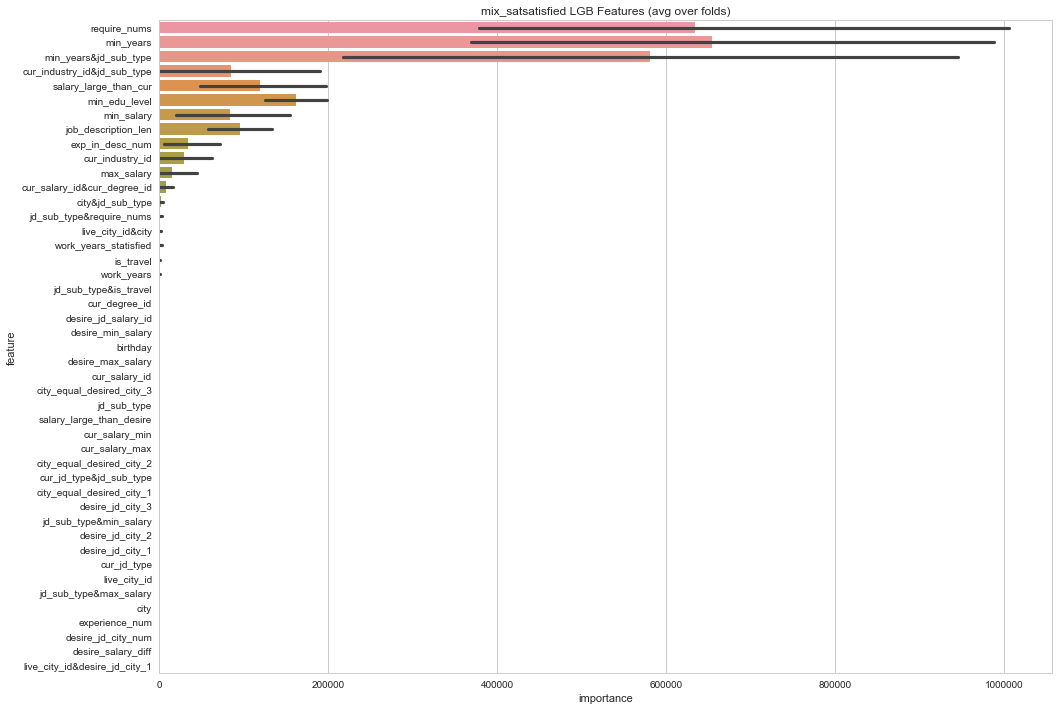

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame()
for idx,model in enumerate(models):
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = idx
    feature_importance = pd.concat([feature_importance,fold_importance])
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False));
plt.title('mix_satsatisfied LGB Features (avg over folds)');

In [58]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
result[["user_id","jd_no"]].to_csv("submission.csv",index=False)

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
